In [105]:
import pandas as pd
%pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [106]:
# Load the required packages
%pip install whois
%pip install tldextract
%pip install scikit-learn
%pip install imblearn

import pandas as pd
import numpy as np 
import re


from sklearn.model_selection import train_test_split
%pip install xgboost
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

import pickle

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from math import sqrt


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [107]:
df = pd.read_csv('Main_dataset.csv')
print(df.isnull().sum())

domain            0
ranking           0
isIp              0
valid             0
activeDuration    0
urlLen            0
is@               0
isredirect        0
haveDash          0
domainLen         0
nosOfSubdomain    0
label             0
dtype: int64


In [108]:
df.shape

(95910, 12)

In [109]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   domain          95910 non-null  object
 1   ranking         95910 non-null  int64 
 2   isIp            95910 non-null  int64 
 3   valid           95910 non-null  int64 
 4   activeDuration  95910 non-null  int64 
 5   urlLen          95910 non-null  int64 
 6   is@             95910 non-null  int64 
 7   isredirect      95910 non-null  int64 
 8   haveDash        95910 non-null  int64 
 9   domainLen       95910 non-null  int64 
 10  nosOfSubdomain  95910 non-null  int64 
 11  label           95910 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 8.8+ MB
None


In [110]:
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.shape

(72363, 12)

Class Legitimate URL: 31025
Class Phishing URL: 41338
Proportion: 0.75 : 1


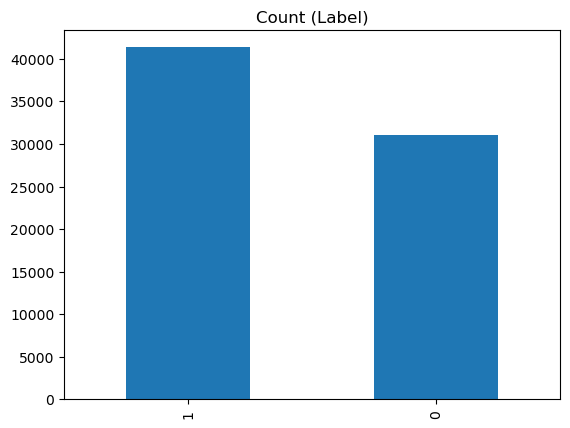

In [111]:
target_count = df.label.value_counts()
print('Class Legitimate URL:', target_count[0])
print('Class Phishing URL:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
df.label.value_counts().plot(kind='bar', title='Count (Label)');

In [112]:
import pandas as pd
import numpy as np
import sys
import re

from urllib.parse import urlparse,urlencode
from datetime import datetime
import ipaddress
import whois
import urllib
import urllib.request
import tldextract

import pickle


class FeatureExtract:

# This class contains the methods that extract the required features
# Across the entire dataset, 0 indicates legitimate url and 1 indicates phishing url
# Legitimate - 0; Phishing - 1


    def __init__(self):
        pass
        
    def rank(self,url):

        # Method to check rank of the URL by connecting to the alexa rank API
        # Returns 0 if the rank is less than 100000 for the given URL else returns 1
        
        try:
            
            #Filling the whitespaces in the URL if any
            
            url = urllib.parse.quote(url)
            rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&url=" + url).read(), "xml").find(
                "REACH")['RANK']
            print('Hello')
            rank = int(rank)
        except TypeError:
            return 1
        if rank <100000:
            return 0
        else:
            return 1

    def isIP(self,url):
        
        # Method to check if an IP is found in the URL
        # Returns 1 if IP is found in the given URL else returns 0
        
        try:
            ipaddress.ip_address(url)
            ip = 1
        except:
            ip = 0
        return ip
    

    def isValid(self,domain_name):
        
        # Method to check the validity of the URL domain
        # Returns 1 if age of the domain is less than 6 else returns 0
        
        creation_date = domain_name.creation_date
        expiration_date = domain_name.expiration_date
        if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
            try:
                creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
                expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
            except:
                  return 1
        if ((expiration_date is None) or (creation_date is None)):
            return 1
        elif ((type(expiration_date) is list) or (type(creation_date) is list)):
            return 1
        else:
            ageofdomain = abs((expiration_date - creation_date).days)
            if ((ageofdomain/30) < 6):
                age = 1
            else:
                age = 0
        return age


    def domain_reg_len(self,domain_name):
        
        # Method to check the expiration of the URL domain
        # Returns 1 if the domain has expired else returns 0
        print('hello')
        expiration_date = domain_name.expiration_date
        if isinstance(expiration_date,str):
            try:
                expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
            except:
                return 1
        if (expiration_date is None):
            return 1
        elif (type(expiration_date) is list):
            return 1
        else:
            today = datetime.now()
            end = abs((expiration_date - today).days)
            if ((end/30) < 6):
                end = 0
            else:
                end = 1
        return end


    def isat(self,url):
        
        # Method to check for '@' in the URL
        # Returns 1 if found else returns 0
        
        if "@" in url:
            return 1    
        else:
            return 0    


    def isRedirect(self,url):
        
        # Method to check for '//' in the URL
        # Returns 1 if found within length of 7 for the given URL or if 'http' is found else returns 0
        
        pos = url.rfind('//')
        if pos > 6:
            if pos > 7:
                return 1
            else:
                return 0
        else:
            return 0


    def haveDash(self,url):
        
        # Method to check for '-' in the URL
        # Returns 1 if found else returns 0
        
        if '-' in urlparse(url).netloc:
            return 1            
        else:
            return 0   
    

    def no_sub_domain(self,url):
        
        # Method to check number of subdomains in the URL
        # Returns 0 if number of subdomains is 1 else returns 1

        url = str(url)
        url = url.replace("www.","")
        url = url.replace("."+tldextract.extract(url).suffix,"")
        count = url.count(".")
        if count==1:
            return 0
        else:
            return 1



    def httpDomain(self,url):
        
        # Method to check for 'https' in the URL
        # Returns 1 if found else returns 0

        domain = urlparse(url).netloc
        if 'https' in domain:
            return 0
        else:
            return 1



    def LongURL(self,url):
        
        # Method to checks the length of the URL
        # Returns 0 if the length is less than 54 else returns 1

        if len(url) < 54:
            return 0           
        else:
            return 1            


    def tinyURL(self,url):
        
        # Method to check if the URL belong to shortening services
        # Returns 1 if found else returns 0
        
        #listing shortening services
    
        shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"
        match=re.search(shortening_services,url)
        if match:
            return 1
        else:
            return 0





class PredictURL(FeatureExtract):
    
    # This class inherits FeatureExtract class to access all its methods
    # The main classification of the URL is done via the methods of this class
    
    def __init__(self):
        pass
        
    
    def predict(self,url):

        print("hi")
        
        # Method to call all the methods in the FeatureExtract class to 
        #get the features of the given URL and appends it to an np array
        # Returns the result of classification by calling the classify function
        
        feature = []
        dns = 0
        
        # URL is passed to whois API to fetch the domain name 
        try:
            print("hi")
            domain_name = whois.whois(urlparse(url).netloc)
            print("hi2")

        except:
            dns = 1

        feature.append(self.rank(url))
        feature.append(1 if dns == 1 else self.isValid(domain_name))
        feature.append(1 if dns == 1 else self.domain_reg_len(domain_name))
        feature.append(self.isat(url))
        feature.append(self.isRedirect(url))
        feature.append(self.haveDash(url))
        feature.append(self.no_sub_domain(url))
        feature.append(self.LongURL(url))
        feature.append(self.tinyURL(url))
        
        return self.classify(np.array(feature).reshape((1,-1)))
        
    
    def __getstate__(self):

        # this method is called when you are
        # going to pickle the class, to know what to pickle
        
        state = self.__dict__.copy()
        
        # don't pickle the parameter fun. otherwise will raise 
        # AttributeError: Can't pickle local object 'Process.__init__.<locals>.<lambda>'
        
        return state
    
    
    def __setstate__(self, state):
        
        self.__dict__.update(state)

        
    def classify(self,features):
        
        #Method to classify the URL, given its features.
        #It loads the saved mode in the pickle file to perform the classification
        
        # Load the pickle file
        
        pick_file = open('my_phishing_model.pkl', 'rb') 
        Pickled_sample_Model = pickle.load(pick_file)
        pick_file.close()
    
        # Classify the URL features using the loaded pickle file
        
        result = Pickled_sample_Model.predict(features)
        if result == 0:
            return "Given website is a legitimate site"
        else:
            return "Given website is a phishing site"
    
# Main function

def main():

    pass

if __name__ == "__main__":
    main()


In [113]:
feature = FeatureExtract()

In [114]:
# # Insert a new column to the dataframe indicating the length of the URL.

df["LongURL"] = df["domain"].apply( lambda x: feature.LongURL(x))

# # Insert a new column to the dataframe indicating if the URL belongs to any of the shortening services.

df["TinyURL"] = df["domain"].apply( lambda x: feature.tinyURL(x))

# # Alter the values in 'nosOfSubdomain' column of the dataframe.
# # If the number of sub domains is more than 1, then it is a phishing site.

df["nosOfSubdomain"] = df["domain"].apply( lambda x: feature.no_sub_domain(x))

# # Alter the values in 'activeDuration' column of the dataframe.
# # If the value is greater than 365 (1 year), then it is a legitimate site.

df["activeDuration"] = df["activeDuration"].apply( lambda x: 1 if x <= 365 else 0)

# # Alter the values in the dataframe column 'ranking'
# # If the value is greater than 100000, then it is a phishing site

df["ranking"] = df["ranking"].apply( lambda x: 0 if x < 100000 else 1)

# Remove the unwanted columns from the dataframe
df.drop(['urlLen','domainLen','domain','isIp'], inplace=True,axis=1)

# Reorder and rename the columns in the dataframe

Columns = ['Rank','isValid','Domain_reg_len','is@','isRedirect','haveDash','SubDomain','Label','LongURL','TinyURL']
new_columns = ['Rank','isValid','Domain_reg_len','is@','isRedirect','haveDash','SubDomain','LongURL','TinyURL','Label']
df.columns = Columns
df = df.reindex(columns=new_columns)
df1 = df.copy(deep=True)


# Shuffle the rows in the dataset so that when splitting the train and test set are equally distributed

df_x = df1.sample(frac=1).reset_index(drop=True)

# Save the dataframe to a csv file 

df_x.to_csv('my_features.csv', encoding='utf-8')

#Display the dataset after data pre-processing

df_x.head()

,Rank,isValid,Domain_reg_len,is@,isRedirect,haveDash,SubDomain,LongURL,TinyURL,Label
0,1,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,0,1,1,0,1
2,1,0,1,0,0,0,1,1,0,1
3,1,1,0,0,0,0,1,0,0,0
4,1,1,0,0,0,0,1,1,0,1


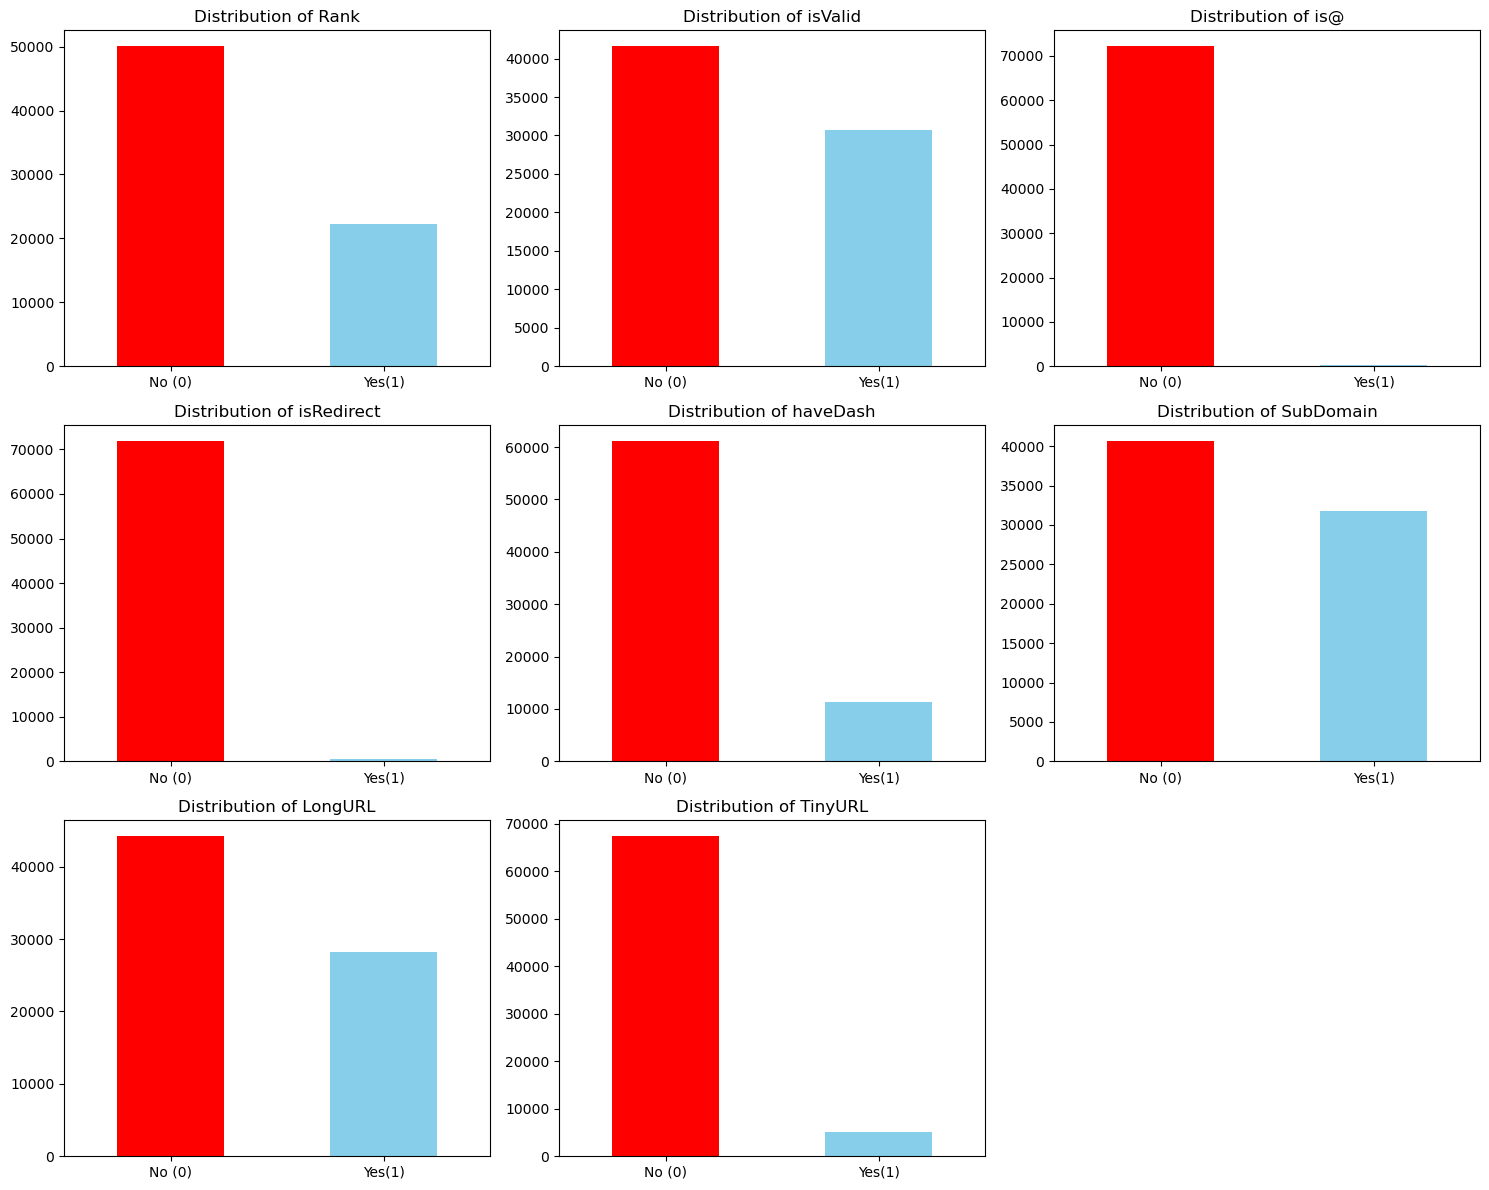

In [116]:
import matplotlib.pyplot as plt

binary_columns = ['Rank','isValid', 'is@', 'isRedirect', 'haveDash', 'SubDomain', 'LongURL', 'TinyURL']

plt.figure(figsize=(15, 12))  # Increase figure size
for i, column in enumerate(binary_columns, 1):
    plt.subplot(3, 3, i)  # 3 rows, 3 cols
    df[column].value_counts().plot(kind='bar', color=['red', 'skyblue'])
    plt.title(f'Distribution of {column}')
    plt.xticks([1,0], ['Yes(1)', 'No (0)'], rotation=0)

plt.tight_layout()
plt.show()

In [117]:
target_count = df['Rank'].value_counts()
try:
  print('Class Legitimate URL:', target_count[0])
except:
  print("no legitimate")
print('Class Phishing URL:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class Legitimate URL: 22316
Class Phishing URL: 50047
Proportion: 0.45 : 1


In [118]:
df_x.describe()

,Rank,isValid,Domain_reg_len,is@,isRedirect,haveDash,SubDomain,LongURL,TinyURL,Label
count,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000
mean,0.691610,0.574727,0.430980,0.002709,0.007504,0.155508,0.561350,0.389343,0.069925,0.571259
std,0.461832,0.494388,0.495217,0.051974,0.086300,0.362390,0.496225,0.487605,0.255023,0.494900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [119]:
# Label column was dropped and stored the feature data in X
from sklearn.model_selection import train_test_split

X=df_x.drop(["Label"],axis=1)

# store the labels in y
y=df_x["Label"]

#split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101,stratify = y)
# stratify = y to preserve imbalance in train/test

Over Sampling

In [122]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data only
smote = SMOTE(random_state=101)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verify new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())

Before SMOTE: 1    33070
0    24820
Name: Label, dtype: int64
After SMOTE: 1    33070
0    33070
Name: Label, dtype: int64


In [124]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay,
    accuracy_score,
    cohen_kappa_score
)
import timeit

def XG_Boost_classifier():
    # Function for XGBoost model (trained on RESAMPLED data)
    global XGB_model
    
    XGB_model = XGBClassifier(
        random_state=100,
        eval_metric='logloss'  # Recommended for binary classification
    )
    
    # Train on RESAMPLED data (X_resampled, y_resampled)
    train_start = timeit.default_timer()
    XGB_model.fit(X_resampled, y_resampled)  # Changed from (X_train, y_train)
    train_time = timeit.default_timer() - train_start
    
    # Evaluate on original TEST data (X_test, y_test)
    test_start = timeit.default_timer()
    pred_XGB_test = XGB_model.predict(X_test)
    test_time = timeit.default_timer() - test_start
    
    # Predict on training data (resampled)
    pred_XGB_train = XGB_model.predict(X_resampled)  # Changed from X_train
    
    # Metrics
    kappa_XGB = cohen_kappa_score(y_test, pred_XGB_test)
    
    print('\n---------- XGBoost (Trained on SMOTE Data) ----------\n')
    print('Classification Report:\n', classification_report(y_test, pred_XGB_test, target_names=['Legitimate (0)', 'Phishing (1)']))
    
    # Confusion Matrix
    disp = ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix(y_test, pred_XGB_test),
        display_labels=['Legitimate (0)', 'Phishing (1)']
    )
    disp.plot()
    plt.show()
    
    return {
        'Model': 'XGBoost',
        'Train Accuracy': accuracy_score(y_resampled, pred_XGB_train),  # Resampled train accuracy
        'Test Accuracy': accuracy_score(y_test, pred_XGB_test),        # Original test accuracy
        'Kappa Score': kappa_XGB
    }

Evaluation Metrics

In [126]:

def Roc_curves():
    
    # Function to display the ROC curves for the models
    plt.figure()
    
    # Add the models to the list that you want to view on the ROC plot
    models = [
    {
        'label': 'XGBoost',
        'model': XGBClassifier(random_state=100),
    }
    ]

    # Below for loop iterates through your models list
    
    for m in models: 
        model = m['model']                # select the model
        model.fit(X_train, y_train)       # train the model
        y_pred=model.predict(X_test)      # predict the test data
    
    # Compute False postive rate, and True positive rate
    
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    
    # Calculate Area under the curve to display on the plot
    
        auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    # Now, plot the computed values
    
        plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
        
    # Custom settings for the plot 
    
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()   

In [127]:
def call_ml_models():
    
    # Function to invoke all the proposed ML models and consolidates the performace of each model
    
    kappa_list = []
    ML_Model = []
    acc_train = []
    acc_test = []
    model_list = [XG_Boost_classifier]
    
    # Below loop iterates to invoke each models in the model_list
    
    for model in model_list: 
        res = model()
        ML_Model.append(res['Model'])
        acc_train.append(res['Train Accuracy'])
        acc_test.append(res['Test Accuracy'])
        kappa_list.append(res['Kappa Score'])
        
    # Call to display the ROC curves of all the models
    
    Roc_curves()
        
    return ML_Model,acc_train,acc_test,kappa_list  




---------- XGBoost (Trained on SMOTE Data) ----------

Classification Report:
                 precision    recall  f1-score   support

Legitimate (0)       0.75      0.85      0.80      6205
  Phishing (1)       0.88      0.79      0.83      8268

      accuracy                           0.82     14473
     macro avg       0.82      0.82      0.82     14473
  weighted avg       0.83      0.82      0.82     14473



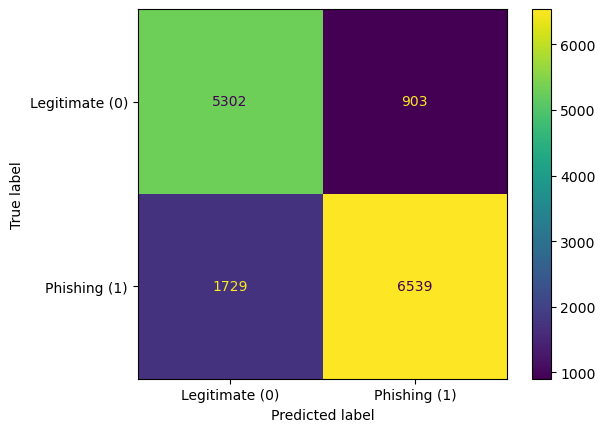

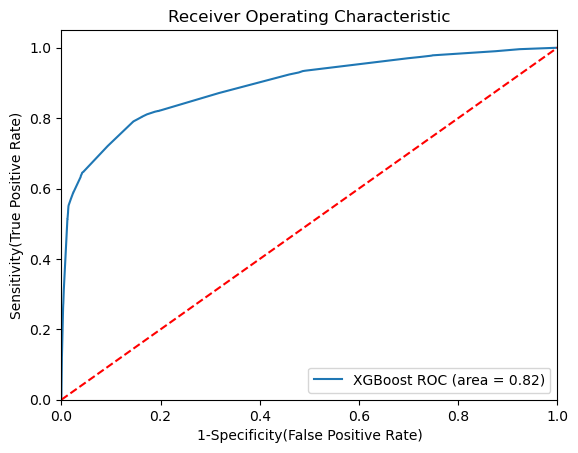

,ML Model,Train Accuracy,Test Accuracy,Kappa Score
0,XGBoost,0.82212,0.818144,0.63481


In [129]:
# Invoke the call models function to display the model performance statistics

ML_Model, acc_train, acc_test, kappa_list = call_ml_models()

# Create the dataframe with the consolidated accuracies and timings of all models

results = pd.DataFrame({ 'ML Model': ML_Model, 
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test, 'Kappa Score': kappa_list
  })

results # Display results

Hyperparameter tuning

In [130]:
# Assign the XGBoost parameters to the parameter grid 

param_grid = [
  {
    'n_estimators': [200, 250],
    'max_depth': [5,6]
  }
]

scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score)}

In [131]:
# Using Grid search to find the hyper parameters of XGBoost

XGB_grid = GridSearchCV(XGB_model, param_grid=param_grid, cv=5, scoring=scoring, refit='AUC', verbose=1, n_jobs=-1)
XGB_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [134]:
# Check for accuracy changes using the fine tuned XGB Model parameters 
XGB_model_best = XGB_grid.best_estimator_
XGB_model_best.fit(X_train, y_train)
pred_RF_test = XGB_model_best.predict(X_test)
pred_RF_train = XGB_model_best.predict(X_train)

kappa_rf = cohen_kappa_score(y_test, pred_RF_test)
train_acc = accuracy_score(y_train,pred_RF_train)
test_acc = accuracy_score(y_test,pred_RF_test)

print('Kappa: ',kappa_rf)
print('Train accuracy: ',train_acc)
print('Test accuracy: ',test_acc)

Kappa:  0.6348100283234812
Train accuracy:  0.8175678010019002
Test accuracy:  0.818144130449803


In [137]:
def save_model(model):
    
    # Function to save the required model using pickle
    
    with open('my_phishing_model.pkl', 'wb') as f:
        pickle.dump(model, f, -1)
        f.close()
       
save_model(XGB_model_best)

Perform the classification using the saved model

In [138]:
# Load the required packages

import pandas as pd
import numpy as np
import sys
import re

from urllib.parse import urlparse,urlencode
from bs4 import BeautifulSoup
from datetime import datetime
import ipaddress
import whois
import urllib
import urllib.request
import tldextract

import pickle


class FeatureExtract:

# This class contains the methods that extract the required features
# Across the entire dataset, 0 indicates legitimate url and 1 indicates phishing url
# Legitimate - 0; Phishing - 1


    def __init__(self):
        pass

    def rank(self,url):

        # Method to check rank of the URL by connecting to the alexa rank API
        # Returns 0 if the rank is less than 100000 for the given URL else returns 1
        
        try:
            
            #Filling the whitespaces in the URL if any
            
            url = urllib.parse.quote(url)
            rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&url=" + url).read(), "xml").find(
                "REACH")['RANK']
            print('Hello')
            rank = int(rank)
        except TypeError:
            return 1
        if rank <100000:
            return 0
        else:
            return 1
        

    def isIP(self,url):
        
        # Method to check if an IP is found in the URL
        # Returns 1 if IP is found in the given URL else returns 0
        
        try:
            ipaddress.ip_address(url)
            ip = 1
        except:
            ip = 0
        return ip
    

    def isValid(self,domain_name):
        
        # Method to check the validity of the URL domain
        # Returns 1 if age of the domain is less than 6 else returns 0
        
        creation_date = domain_name.creation_date
        expiration_date = domain_name.expiration_date
        if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
            try:
                creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
                expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
            except:
                  return 1
        if ((expiration_date is None) or (creation_date is None)):
            return 1
        elif ((type(expiration_date) is list) or (type(creation_date) is list)):
            return 1
        else:
            ageofdomain = abs((expiration_date - creation_date).days)
            if ((ageofdomain/30) < 6):
                age = 1
            else:
                age = 0
        return age


    def domain_reg_len(self,domain_name):
        
        # Method to check the expiration of the URL domain
        # Returns 1 if the domain has expired else returns 0
        print('hello')
        expiration_date = domain_name.expiration_date
        if isinstance(expiration_date,str):
            try:
                expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
            except:
                return 1
        if (expiration_date is None):
            return 1
        elif (type(expiration_date) is list):
            return 1
        else:
            today = datetime.now()
            end = abs((expiration_date - today).days)
            if ((end/30) < 6):
                end = 0
            else:
                end = 1
        return end


    def isat(self,url):
        
        # Method to check for '@' in the URL
        # Returns 1 if found else returns 0
        
        if "@" in url:
            return 1    
        else:
            return 0    


    def isRedirect(self,url):
        
        # Method to check for '//' in the URL
        # Returns 1 if found within length of 7 for the given URL or if 'http' is found else returns 0
        
        pos = url.rfind('//')
        if pos > 6:
            if pos > 7:
                return 1
            else:
                return 0
        else:
            return 0


    def haveDash(self,url):
        
        # Method to check for '-' in the URL
        # Returns 1 if found else returns 0
        
        if '-' in urlparse(url).netloc:
            return 1            
        else:
            return 0   
    

    def no_sub_domain(self,url):
        
        # Method to check number of subdomains in the URL
        # Returns 0 if number of subdomains is 1 else returns 1

        url = str(url)
        url = url.replace("www.","")
        url = url.replace("."+tldextract.extract(url).suffix,"")
        count = url.count(".")
        if count==1:
            return 0
        else:
            return 1



    def httpDomain(self,url):
        
        # Method to check for 'https' in the URL
        # Returns 1 if found else returns 0

        domain = urlparse(url).netloc
        if 'https' in domain:
            return 0
        else:
            return 1


    def LongURL(self,url):
        
        # Method to checks the length of the URL
        # Returns 0 if the length is less than 54 else returns 1

        if len(url) < 54:
            return 0           
        else:
            return 1            


    def tinyURL(self,url):
        
        # Method to check if the URL belong to shortening services
        # Returns 1 if found else returns 0
        
        #listing shortening services
    
        shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"
        match=re.search(shortening_services,url)
        if match:
            return 1
        else:
            return 0





class PredictURL(FeatureExtract):
    
    # This class inherits FeatureExtract class to access all its methods
    # The main classification of the URL is done via the methods of this class
    
    def __init__(self):
        pass
        
    
    def predict(self,url):

        print("hi")
        
        # Method to call all the methods in the FeatureExtract class to 
        #get the features of the given URL and appends it to an np array
        # Returns the result of classification by calling the classify function
        
        feature = []
        dns = 0
        
        #URL is passed to whois API to fetch the domain name 
        try:
            print("hi")
            domain_name = whois.whois(urlparse(url).netloc)
            print("hi2")

        except:
            dns = 1
       
        feature.append(self.isIP(url))
        feature.append(1 if dns == 1 else self.isValid(domain_name))
        feature.append(1 if dns == 1 else self.domain_reg_len(domain_name))
        feature.append(self.isat(url))
        feature.append(self.isRedirect(url))
        feature.append(self.haveDash(url))
        feature.append(self.no_sub_domain(url))
        feature.append(self.LongURL(url))
        feature.append(self.tinyURL(url))

        
        return self.classify(np.array(feature).reshape((1,-1)))
        
       
    
    def __getstate__(self):

        # this method is called when you are
        # going to pickle the class, to know what to pickle
        
        state = self.__dict__.copy()
        
        # don't pickle the parameter fun. otherwise will raise 
        # AttributeError: Can't pickle local object 'Process.__init__.<locals>.<lambda>'
        
        return state
    
    
    def __setstate__(self, state):
        
        self.__dict__.update(state)

        
    def classify(self,features):
        
        #Method to classify the URL, given its features.
        #It loads the saved mode in the pickle file to perform the classification
        
        # Load the pickle file
        
        pick_file = open('my_phishing_model.pkl', 'rb') 
        Pickled_sample_Model = pickle.load(pick_file)
        pick_file.close()
    
        # Classify the URL features using the loaded pickle file
        
        result = Pickled_sample_Model.predict(features)
        if result == 0:
            return "Given website is a legitimate site"
        else:
            return "Given website is a phishing site"
    
# Main function

def main():

    pass

if __name__ == "__main__":
    main()


In [139]:
classification = PredictURL()

In [140]:
classification.predict('https://www.facebook.com')

hi
hi


'Given website is a legitimate site'